In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка и первичный обзор

In [2]:
df0 = pd.read_csv('cumulative.csv')

needed_columns = [
    # Идентификаторы
    'rowid',
    'kepid',
    'kepoi_name',
    'kepler_name',
    'koi_disposition',
    'koi_pdisposition',
    'koi_score',

    # Параметры планеты
    'koi_period',
    'koi_prad',
    'koi_teq',
    'koi_insol',

    # Параметры транзита
    'koi_duration',
    'koi_depth',
    'koi_model_snr',

    # Параметры звезды
    'koi_steff',
    'koi_srad',
    'koi_kepmag',

    # Координаты звезды
    'ra',
    'dec'
]

df = df0[needed_columns].copy()

df.columns = [
    'id', 'kepid', 'koi_name', 'kepler_name',
    'disposition', 'pdisposition', 'score',
    'period', 'radius_planet', 'temp_planet_eq', 'insolation',
    'duration', 'depth', 'model_snr',
    'temp_star_eq', 'radius_star', 'mag_star',
    'ra', 'dec'
]

In [3]:
df.head(10)

,id,kepid,koi_name,kepler_name,disposition,pdisposition,score,period,radius_planet,temp_planet_eq,insolation,duration,depth,model_snr,temp_star_eq,radius_star,mag_star,ra,dec
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,2.26,793.0,93.59,2.95750,615.8,35.8,5455.0,0.927,15.347,291.93423,48.141651
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,2.83,443.0,9.11,4.50700,874.8,25.8,5455.0,0.927,15.347,291.93423,48.141651
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,14.60,638.0,39.30,1.78220,10829.0,76.3,5853.0,0.868,15.436,297.00482,48.134129
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,33.46,1395.0,891.96,2.40641,8079.2,505.6,5805.0,0.791,15.597,285.53461,48.285210
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,2.75,1406.0,926.16,1.65450,603.3,40.9,6031.0,1.046,15.509,288.75488,48.226200
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,11.094321,3.90,835.0,114.81,4.59450,1517.5,66.5,6046.0,0.972,15.714,296.28613,48.224670
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,4.134435,2.77,1160.0,427.65,3.14020,686.0,40.2,6046.0,0.972,15.714,296.28613,48.224670
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,2.566589,1.59,1360.0,807.74,2.42900,226.5,15.0,6046.0,0.972,15.714,296.28613,48.224670
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,7.361790,39.21,1342.0,767.22,5.02200,233.7,47.7,6227.0,1.958,12.660,298.86435,42.151569
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,16.068647,5.76,600.0,30.75,3.53470,4914.3,161.9,5031.0,0.848,15.841,286.99948,48.375790


In [4]:
df.tail(10)

,id,kepid,koi_name,kepler_name,disposition,pdisposition,score,period,radius_planet,temp_planet_eq,insolation,duration,depth,model_snr,temp_star_eq,radius_star,mag_star,ra,dec
9554,9555,8308347,K03761.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,164.950399,11.23,252.0,0.95,30.8600,24493.0,65.7,5001.0,0.664,15.473,294.89749,44.215790
9555,9556,2697935,K03853.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,21.513523,534.47,1006.0,242.54,77.9830,1583.8,171.5,5088.0,3.318,10.630,287.46786,37.966640
9556,9557,8258160,K03870.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,23.627035,21.71,560.0,23.17,11.4810,8433.0,78.4,5305.0,0.857,16.375,299.21881,44.181862
9557,9558,11911561,K03875.01,NaN,CANDIDATE,CANDIDATE,1.000,8.870416,39.46,1151.0,414.26,1.2864,873.1,43.8,6022.0,1.514,13.579,290.14914,50.239178
9558,9559,8765560,K03891.01,NaN,CANDIDATE,CANDIDATE,1.000,47.109631,78.98,751.0,75.40,5.7410,752.2,35.1,5258.0,2.780,13.731,296.15601,44.920090
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,8.589871,1.11,929.0,176.40,4.8060,87.7,8.4,5638.0,1.088,14.478,298.74921,46.973351
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0.527699,29.35,2088.0,4500.53,3.2221,1579.2,453.3,5638.0,0.903,14.082,297.18875,47.093819
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,1.739849,0.72,1608.0,1585.81,3.1140,48.5,10.6,6119.0,1.031,14.757,286.50937,47.163219
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0.681402,1.07,2218.0,5713.41,0.8650,103.6,12.3,6173.0,1.041,15.385,294.16489,47.176281
9563,9564,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,4.856035,1.05,1266.0,607.42,3.0780,76.7,8.2,6469.0,1.193,14.826,297.00977,47.121021


In [5]:
print('>>> Структура данных <<<')
df.info()

>>> Структура данных <<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9564 non-null   int64  
 1   kepid           9564 non-null   int64  
 2   koi_name        9564 non-null   object 
 3   kepler_name     2294 non-null   object 
 4   disposition     9564 non-null   object 
 5   pdisposition    9564 non-null   object 
 6   score           8054 non-null   float64
 7   period          9564 non-null   float64
 8   radius_planet   9201 non-null   float64
 9   temp_planet_eq  9201 non-null   float64
 10  insolation      9243 non-null   float64
 11  duration        9564 non-null   float64
 12  depth           9201 non-null   float64
 13  model_snr       9201 non-null   float64
 14  temp_star_eq    9201 non-null   float64
 15  radius_star     9201 non-null   float64
 16  mag_star        9563 non-null   float64
 17  ra      

In [6]:
print('>>> Типы данных <<<')
df.dtypes

>>> Типы данных <<<


id                  int64
kepid               int64
koi_name           object
kepler_name        object
disposition        object
pdisposition       object
score             float64
period            float64
radius_planet     float64
temp_planet_eq    float64
insolation        float64
duration          float64
depth             float64
model_snr         float64
temp_star_eq      float64
radius_star       float64
mag_star          float64
ra                float64
dec               float64
dtype: object

In [7]:
print('>>> Размер таблицы <<<')
print(f'\nКоличество строк: {df.shape[0]}, количество столбцов: {df.shape[1]}')

>>> Размер таблицы <<<

Количество строк: 9564, количество столбцов: 19


### Обработка данных

#### Пропущенные значения

In [8]:
# Кол-во пропусков
print("Количество пропусков в каждом столбце:")
print(df.isnull().sum())

Количество пропусков в каждом столбце:
id                   0
kepid                0
koi_name             0
kepler_name       7270
disposition          0
pdisposition         0
score             1510
period               0
radius_planet      363
temp_planet_eq     363
insolation         321
duration             0
depth              363
model_snr          363
temp_star_eq       363
radius_star        363
mag_star             1
ra                   0
dec                  0
dtype: int64


In [9]:
print("Процент пропусков:")
print((df.isnull().mean() * 100).round().astype(int))

Процент пропусков:
id                 0
kepid              0
koi_name           0
kepler_name       76
disposition        0
pdisposition       0
score             16
period             0
radius_planet      4
temp_planet_eq     4
insolation         3
duration           0
depth              4
model_snr          4
temp_star_eq       4
radius_star        4
mag_star           0
ra                 0
dec                0
dtype: int64


In [10]:
# Удаляем строки физических параметров
cols_to_drop = [
    'radius_planet', 'temp_planet_eq', 'insolation', 'depth',
    'model_snr', 'temp_star_eq', 'radius_star', 'mag_star'
]

df = df.dropna(subset=cols_to_drop)
print('Количество пропусков после удаления строк:\n')
print(df.isnull().sum())

Количество пропусков после удаления строк:

id                   0
kepid                0
koi_name             0
kepler_name       6907
disposition          0
pdisposition         0
score             1206
period               0
radius_planet        0
temp_planet_eq       0
insolation           0
duration             0
depth                0
model_snr            0
temp_star_eq         0
radius_star          0
mag_star             0
ra                   0
dec                  0
dtype: int64


In [11]:
# Заполняем строки медианным значением столбца score  
df['score'] = df['score'].fillna(df['score'].median())
print(f"Количество пропусков столбца score: {df['score'].isnull().sum()}")

Количество пропусков столбца score: 0


In [12]:
df['kepler_name'] =df['kepler_name'].fillna('Unnamed')
print(f"Количество пропусков столбца kepler_name: {df['score'].isnull().sum()}")

Количество пропусков столбца kepler_name: 0


In [13]:
print('>>> Таблица после заполнения пропусков <<<')
df.tail(10)

>>> Таблица после заполнения пропусков <<<


,id,kepid,koi_name,kepler_name,disposition,pdisposition,score,period,radius_planet,temp_planet_eq,insolation,duration,depth,model_snr,temp_star_eq,radius_star,mag_star,ra,dec
9554,9555,8308347,K03761.01,Unnamed,FALSE POSITIVE,FALSE POSITIVE,0.000,164.950399,11.23,252.0,0.95,30.8600,24493.0,65.7,5001.0,0.664,15.473,294.89749,44.215790
9555,9556,2697935,K03853.01,Unnamed,FALSE POSITIVE,FALSE POSITIVE,0.000,21.513523,534.47,1006.0,242.54,77.9830,1583.8,171.5,5088.0,3.318,10.630,287.46786,37.966640
9556,9557,8258160,K03870.01,Unnamed,FALSE POSITIVE,FALSE POSITIVE,0.000,23.627035,21.71,560.0,23.17,11.4810,8433.0,78.4,5305.0,0.857,16.375,299.21881,44.181862
9557,9558,11911561,K03875.01,Unnamed,CANDIDATE,CANDIDATE,1.000,8.870416,39.46,1151.0,414.26,1.2864,873.1,43.8,6022.0,1.514,13.579,290.14914,50.239178
9558,9559,8765560,K03891.01,Unnamed,CANDIDATE,CANDIDATE,1.000,47.109631,78.98,751.0,75.40,5.7410,752.2,35.1,5258.0,2.780,13.731,296.15601,44.920090
9559,9560,10031643,K07984.01,Unnamed,FALSE POSITIVE,FALSE POSITIVE,0.000,8.589871,1.11,929.0,176.40,4.8060,87.7,8.4,5638.0,1.088,14.478,298.74921,46.973351
9560,9561,10090151,K07985.01,Unnamed,FALSE POSITIVE,FALSE POSITIVE,0.000,0.527699,29.35,2088.0,4500.53,3.2221,1579.2,453.3,5638.0,0.903,14.082,297.18875,47.093819
9561,9562,10128825,K07986.01,Unnamed,CANDIDATE,CANDIDATE,0.497,1.739849,0.72,1608.0,1585.81,3.1140,48.5,10.6,6119.0,1.031,14.757,286.50937,47.163219
9562,9563,10147276,K07987.01,Unnamed,FALSE POSITIVE,FALSE POSITIVE,0.021,0.681402,1.07,2218.0,5713.41,0.8650,103.6,12.3,6173.0,1.041,15.385,294.16489,47.176281
9563,9564,10156110,K07989.01,Unnamed,FALSE POSITIVE,FALSE POSITIVE,0.000,4.856035,1.05,1266.0,607.42,3.0780,76.7,8.2,6469.0,1.193,14.826,297.00977,47.121021


In [14]:
print('\n>>> Размер таблицы <<<')
print(f'Количество строк: {df.shape[0]}, количество столбцов: {df.shape[1]}')

print('\n>>> Кол-во пропусков <<<\n')
print(df.isnull().sum())


>>> Размер таблицы <<<
Количество строк: 9200, количество столбцов: 19

>>> Кол-во пропусков <<<

id                0
kepid             0
koi_name          0
kepler_name       0
disposition       0
pdisposition      0
score             0
period            0
radius_planet     0
temp_planet_eq    0
insolation        0
duration          0
depth             0
model_snr         0
temp_star_eq      0
radius_star       0
mag_star          0
ra                0
dec               0
dtype: int64


#### Дубликаты

In [15]:
print('>>> Кол-во дубликатов <<<')
print(df.duplicated().sum())

>>> Кол-во дубликатов <<<
0


#### Выбросы

##### Boxplot "До"

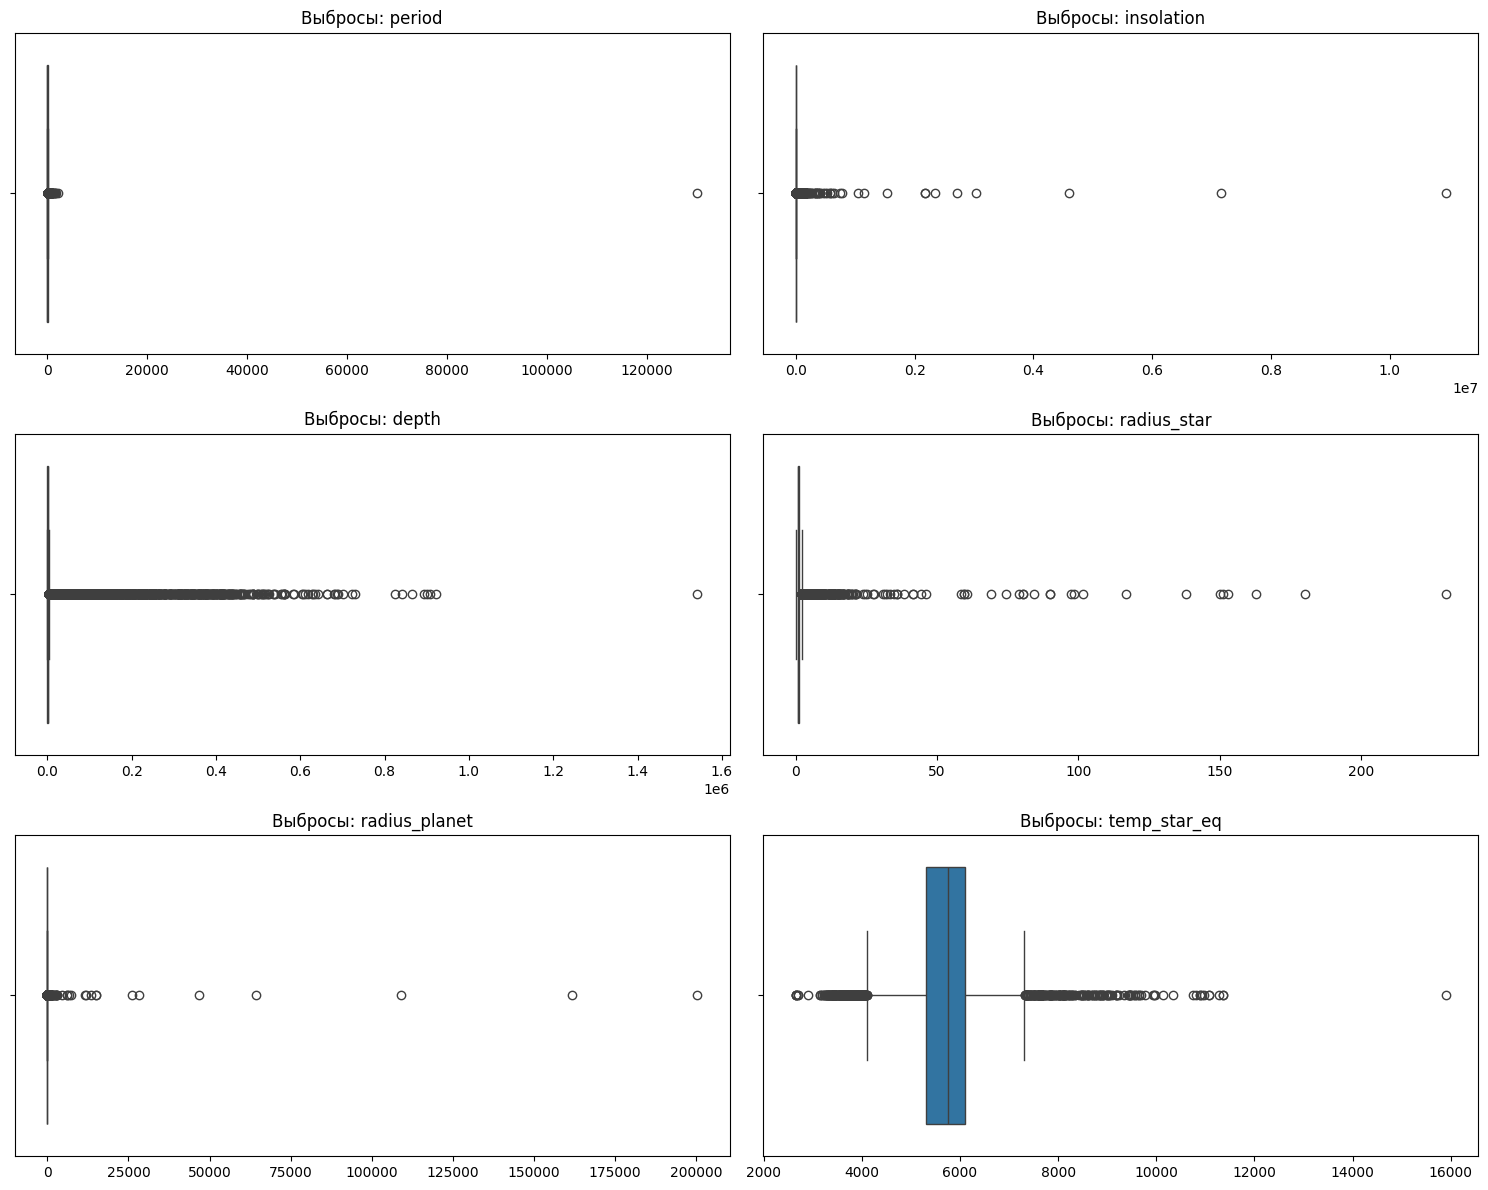

In [16]:
# Список колонок, на проверку выбросов
columns_to_plot = [
    'period',
    'insolation',
    'depth',
    'radius_star',
    'radius_planet',
    'temp_star_eq'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Выбросы: {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [17]:
df_copy = df.copy()

# Очистка по Z-score для insolation, depth
for col in ['insolation', 'depth', 'radius_star']:
    z_scores = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    df_copy = df_copy[abs(z_scores) < 3]

# Ручная очистка для планетарных параметров
# Убираем невозможные радиусы планет (оставляем до 50 радиусов Земли)
df_copy = df_copy[df_copy['radius_planet'] < 50]

# Убираем слишком длинные периоды (оставляем до 730 дней (2 лет))
df_copy = df_copy[df_copy['period'] < 730]

# Убираем планеты с большим излучением (оставляем < 2000 земных потоков)
df_copy = df_copy[df_copy['insolation'] < 2000]

print(f"Было строк: {df.shape[0]}")
print(f"Стало строк: {df_copy.shape[0]}")

df = df_copy.copy()

Было строк: 9200
Стало строк: 7034


#### Boxplot "После"

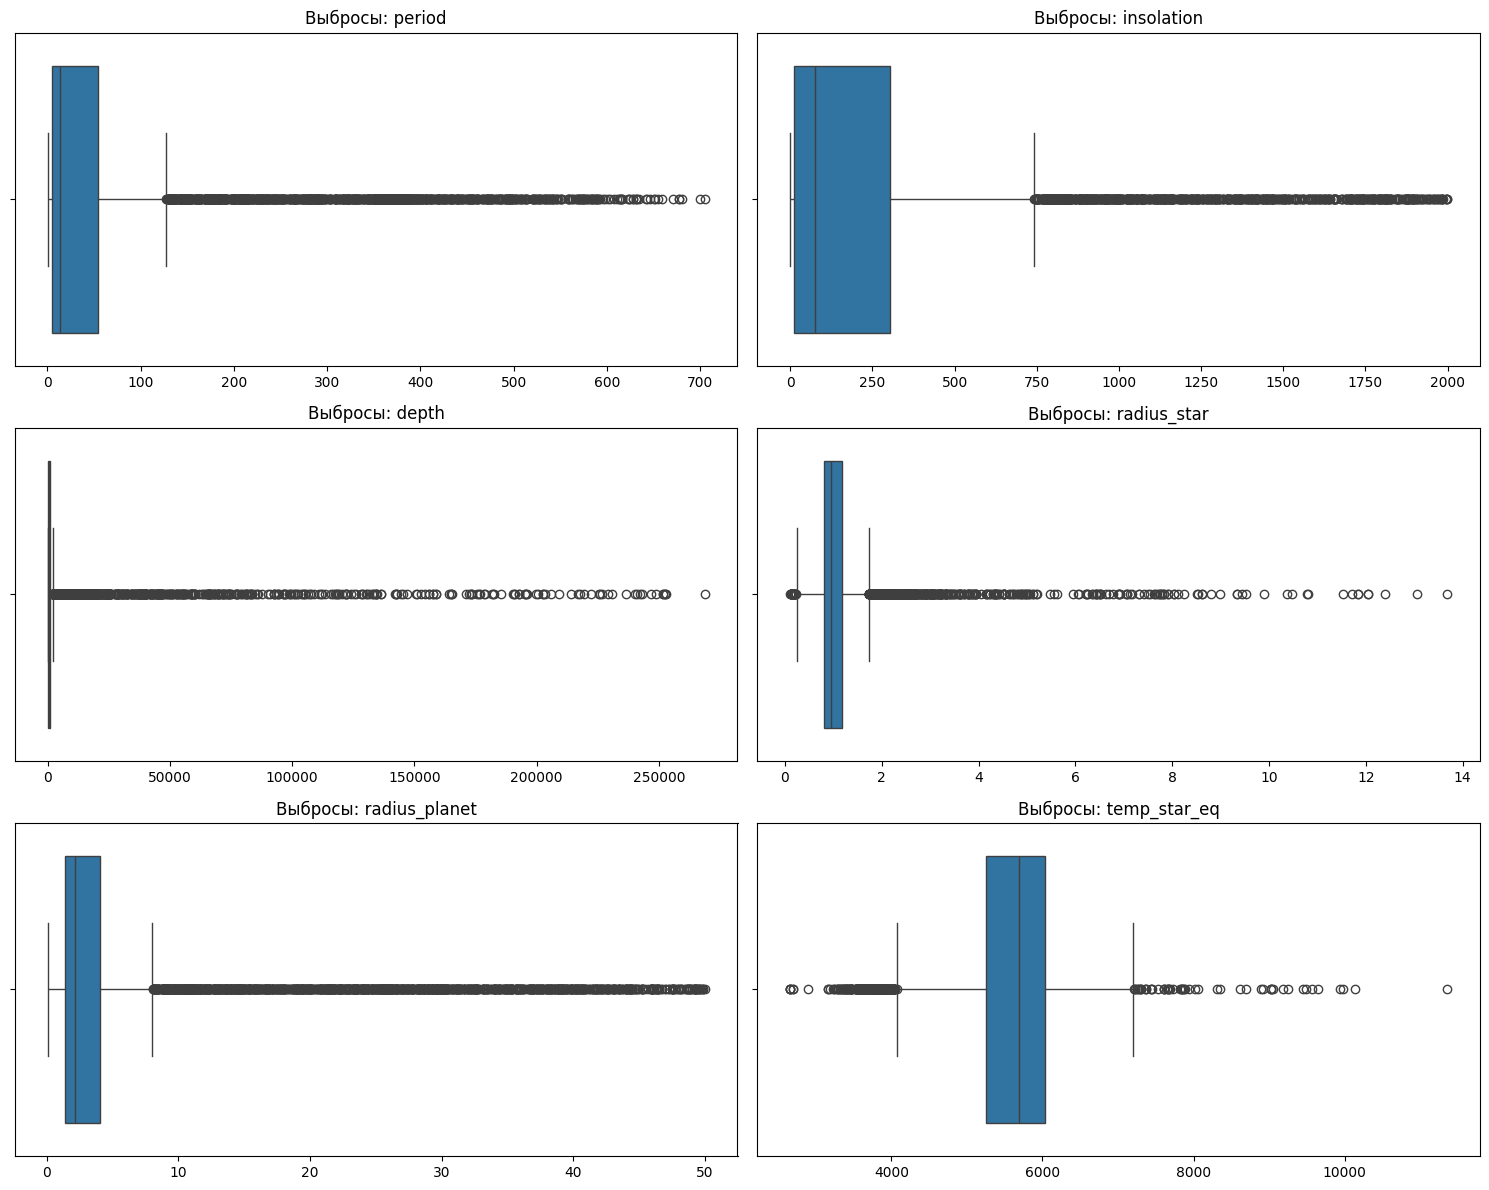

In [18]:
plt.figure(figsize=(15, 12))

for i, col in enumerate(columns_to_plot):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Выбросы: {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

### Статистики данных

In [19]:
# Описательная статистика
print('>>>>> Описательная статистика <<<<<')
print(df.describe().T)

>>>>> Описательная статистика <<<<<
                 count          mean           std            min  \
id              7034.0  4.339543e+03  2.736803e+03       1.000000   
kepid           7034.0  7.778332e+06  2.652280e+06  757450.000000   
score           7034.0  5.757535e-01  4.323682e-01       0.000000   
period          7034.0  7.141976e+01  1.295848e+02       0.259820   
radius_planet   7034.0  6.442098e+00  1.040930e+01       0.080000   
temp_planet_eq  7034.0  7.943806e+02  3.931266e+02      92.000000   
insolation      7034.0  2.642367e+02  4.186822e+02       0.020000   
duration        7034.0  5.707072e+00  6.052150e+00       0.104600   
depth           7034.0  5.962185e+03  2.442498e+04       1.700000   
model_snr       7034.0  1.203479e+02  4.231096e+02       0.800000   
temp_star_eq    7034.0  5.593400e+03  6.988804e+02    2661.000000   
radius_star     7034.0  1.157096e+00  9.351259e-01       0.109000   
mag_star        7034.0  1.442283e+01  1.244208e+00       7.899000  

In [20]:
# Подсчёт уникальных значений и частот
print('>>> Распределение по статусам (disposition) <<<\n')
print(df['disposition'].value_counts())


print('\n>>> Количество уникальных названий планет <<<')
print(f'Всего планет: {df.shape[0]}')
print(f"Всего уникальных звезд: {df['kepid'].nunique()}")

>>> Распределение по статусам (disposition) <<<

disposition
FALSE POSITIVE    2809
CONFIRMED         2217
CANDIDATE         2008
Name: count, dtype: int64

>>> Количество уникальных названий планет <<<
Всего планет: 7034
Всего уникальных звезд: 5857


In [21]:
# Считаем, сколько планет у каждой звезды
planets_per_star = df['kepid'].value_counts()

print("Звезды с наибольшим количеством планет-кандидатов:\n")
print(planets_per_star.head(10))

print("\nРаспределение мультипланетных систем:")
print(planets_per_star.value_counts().sort_index())

Звезды с наибольшим количеством планет-кандидатов:

kepid
11442793    7
6541920     6
10187017    6
11968463    6
4833421     5
8609450     5
10397751    5
10122538    5
7673192     5
5436502     5
Name: count, dtype: int64

Распределение мультипланетных систем:
count
1    5054
2     550
3     166
4      58
5      25
6       3
7       1
Name: count, dtype: int64


In [22]:
# Визуализация мультипланетных систем по стутасам

top_stars_ids = planets_per_star[planets_per_star >= 5].index
df_top_stars = df[df['kepid'].isin(top_stars_ids)]

# Сводная таблица
pivot = pd.crosstab(df_top_stars['kepid'], df_top_stars['disposition'])

print("Статусы планет в самых крупных системах:")
display(pivot)

Статусы планет в самых крупных системах:


disposition,CANDIDATE,CONFIRMED,FALSE POSITIVE
kepid,,,
3832474,0,3,2
4571004,0,0,5
4833421,0,5,0
4852528,0,5,0
5301750,0,5,0
5351250,0,4,1
5436502,0,5,0
5689351,0,5,0
5792202,1,2,2


>>> Матрица корреляций <<<


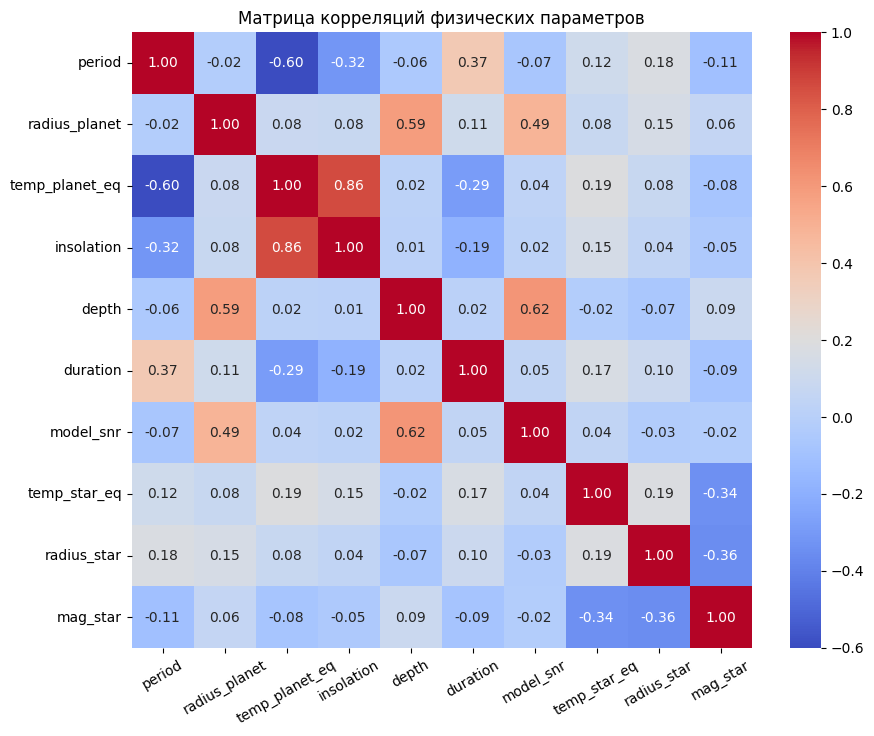

In [23]:
# Корреляционный анализ
print(">>> Матрица корреляций <<<")

cols_physics = [
    'period', 'radius_planet', 'temp_planet_eq', 'insolation', 
    'depth', 'duration', 'model_snr',
    'temp_star_eq', 'radius_star', 'mag_star'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_physics].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f")
plt.title('Матрица корреляций физических параметров')
plt.xticks(rotation=30)
plt.show()

### Визуализация данных

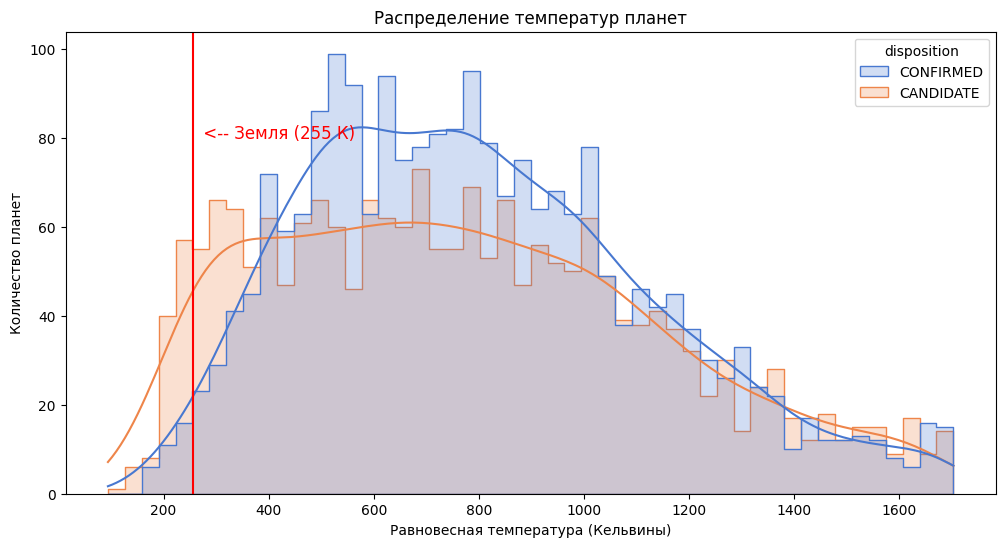

In [24]:
# Гистограмма
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df[df['disposition'].isin(['CONFIRMED', 'CANDIDATE'])], 
    x='temp_planet_eq', 
    hue='disposition', 
    kde=True, 
    element="step", 
    bins=50,
    palette='muted'
)

# Линия Земли
plt.axvline(255, color='red')
plt.text(265, 80, ' <-- Земля (255 К)', color='red', fontsize=12)

plt.title('Распределение температур планет')
plt.xlabel('Равновесная температура (Кельвины)')
plt.ylabel('Количество планет')
plt.show()

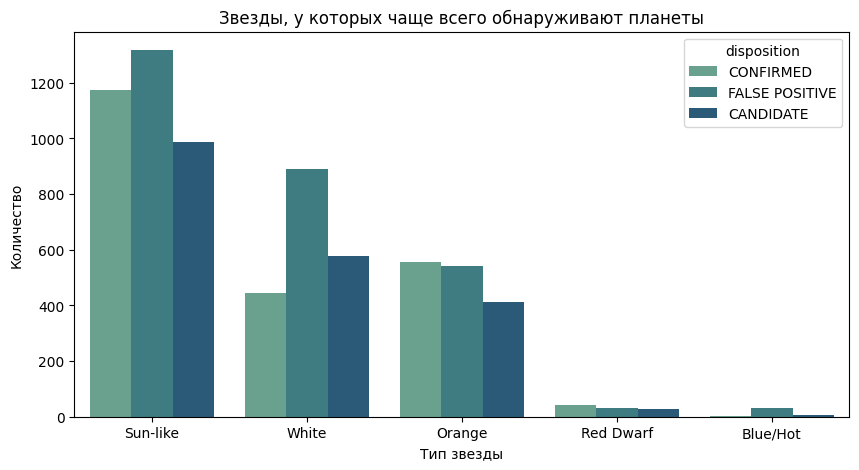

In [25]:
# Столбчатая диаграмма
# Функция для классификации звезды
def classify_star(temp):
    if temp < 3700: return 'Red Dwarf'
    elif temp < 5200: return 'Orange'
    elif temp < 6000: return 'Sun-like'
    elif temp < 7500: return 'White'
    else: return 'Blue/Hot'

df['star_type'] = df['temp_star_eq'].apply(classify_star)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, 
              x='star_type', 
              hue='disposition', 
              palette='crest')
plt.title('Звезды, у которых чаще всего обнаруживают планеты')
plt.xlabel('Тип звезды')
plt.ylabel('Количество')
plt.show()

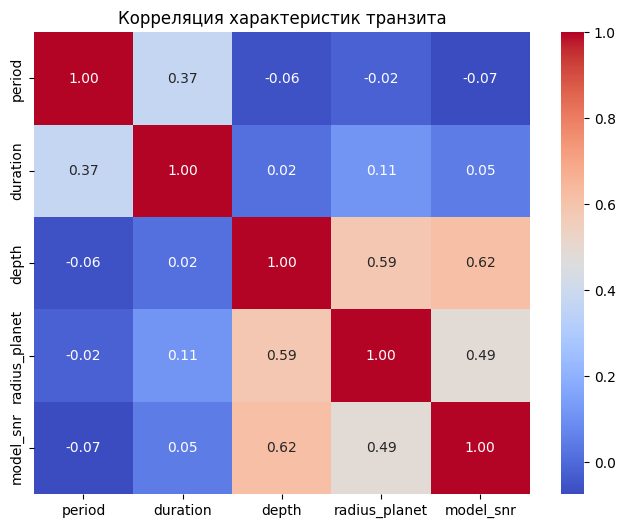

In [26]:
# Heatmap корреляций
# Выбираем колонки транзита
cols_transit = [
    'period', 
    'duration', 
    'depth', 
    'radius_planet', 
    'model_snr'
]

plt.figure(figsize=(8, 6))
sns.heatmap(df[cols_transit].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f")
plt.title('Корреляция характеристик транзита')
plt.show()

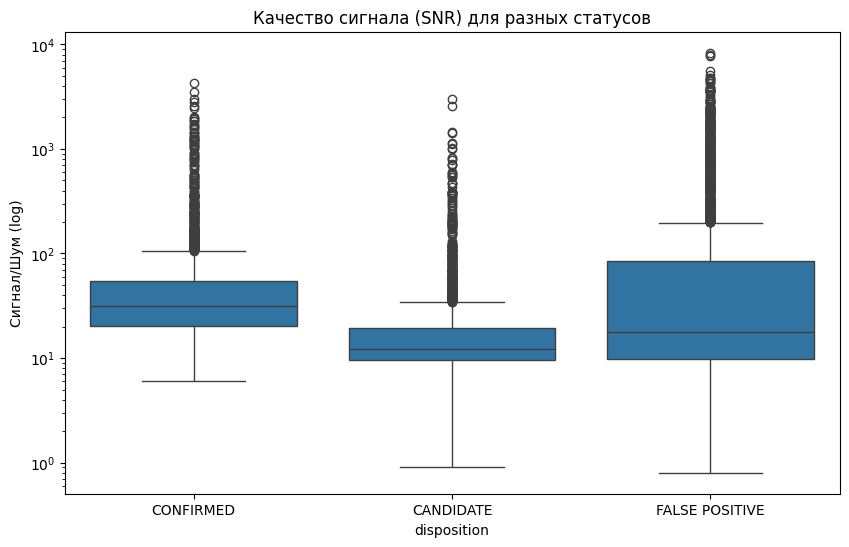

In [27]:
# Boxplot
plt.figure(figsize=(10, 6))

# Порядок категорий на оси X
order = ['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']

sns.boxplot(data=df, 
            x='disposition', 
            y='model_snr', 
            order=order)

plt.yscale('log')
plt.title('Качество сигнала (SNR) для разных статусов')
plt.ylabel('Сигнал/Шум (log)')
plt.show()

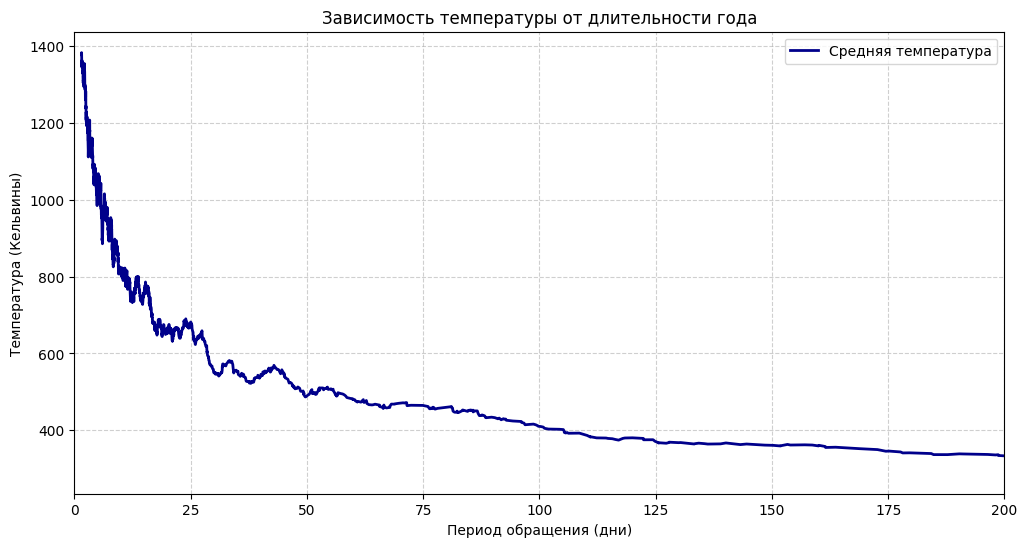

In [28]:
# Линейный график
plt.figure(figsize=(12, 6))

line_data = df[df['disposition'] == 'CONFIRMED'].sort_values('period')

# Мы усредняем температуру каждых 50 ближайших по периоду планет
y_smoothed = line_data['temp_planet_eq'].rolling(window=50).mean()

plt.plot(line_data['period'], 
         y_smoothed,
        color='darkblue', 
        linewidth=2, 
        label='Средняя температура')

plt.title('Зависимость температуры от длительности года')
plt.xlabel('Период обращения (дни)')
plt.ylabel('Температура (Кельвины)')
plt.xlim(0, 200)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### Группировки и агрегации

In [29]:
# Медиана по группам
print(">>> Медиана радиуса по статусу <<<")
median_radius = df.groupby('disposition')['radius_planet'].median()
display(median_radius)

>>> Медиана радиуса по статусу <<<


disposition
CANDIDATE         1.73
CONFIRMED         2.18
FALSE POSITIVE    2.66
Name: radius_planet, dtype: float64

In [30]:
print("\n>>> Где чаще находят жизнь <<<")
# Берем только подтвержденные планеты
confirmed_only = df[df['disposition'] == 'CONFIRMED']
stars_count = confirmed_only.groupby('star_type')['kepid'].count().sort_values(ascending=False)
display(stars_count)


>>> Где чаще находят жизнь <<<


star_type
Sun-like     1173
Orange        555
White         446
Red Dwarf      42
Blue/Hot        1
Name: kepid, dtype: int64

In [31]:
print("\n>>> Температурный режим (мин, макс и среднее <<<")
temp_stats = df.groupby('disposition')['temp_planet_eq'].agg(['min', 'mean', 'max'])
display(temp_stats)


>>> Температурный режим (мин, макс и среднее <<<


,min,mean,max
disposition,,,
CANDIDATE,94.0,770.871016,1701.0
CONFIRMED,166.0,801.395129,1703.0
FALSE POSITIVE,92.0,805.650053,1705.0


In [32]:
# Сохраняем очищеннный датасет
df.to_csv('kepler_cleaned.csv', index=False)